Data

- `price`: precio
- `area`: área
- `bedrooms`: habitaciones
- `bathrooms`: baños
- `stories`: pisos
- `mainroad`: carretera principal
- `guestroom`: cuarto de huéspedes
- `basement`: sótano
- `hotwaterheating`: calefacción de agua caliente
- `airconditioning`: aire acondicionado
- `parking`: estacionamiento
- `prefarea`: área preferida
- `furnishingstatus`: estado del amueblado

In [101]:
#LIBRERIAS
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Modelo de regresion lineal
from sklearn.linear_model import LinearRegression
#Para rendimiento
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
#Carga de datos
df = pd.read_csv('housing.csv', delimiter=',')
df.dataframeName = 'housing.csv'
numRows, numCols = df.shape
print(f'Hay {numRows} filas y {numCols} columnas.')

Hay 545 filas y 13 columnas.


In [103]:
#Muestra los primeros 5 datos
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [104]:
#resumen estadístico de cada columna 
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Analisis. 
- `count`: El número de valores no vacíos.
- `mean`: El valor promedio (media).
- `std`: La desviación estándar.
- `min`: El valor mínimo.
- `25%`: El percentil 25.
- `50%`: El percentil 50 (también conocido como la mediana).
- `75%`: El percentil 75.
- `max`: El valor máximo.

In [105]:
#Tipos de datos que hay en el dataset
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

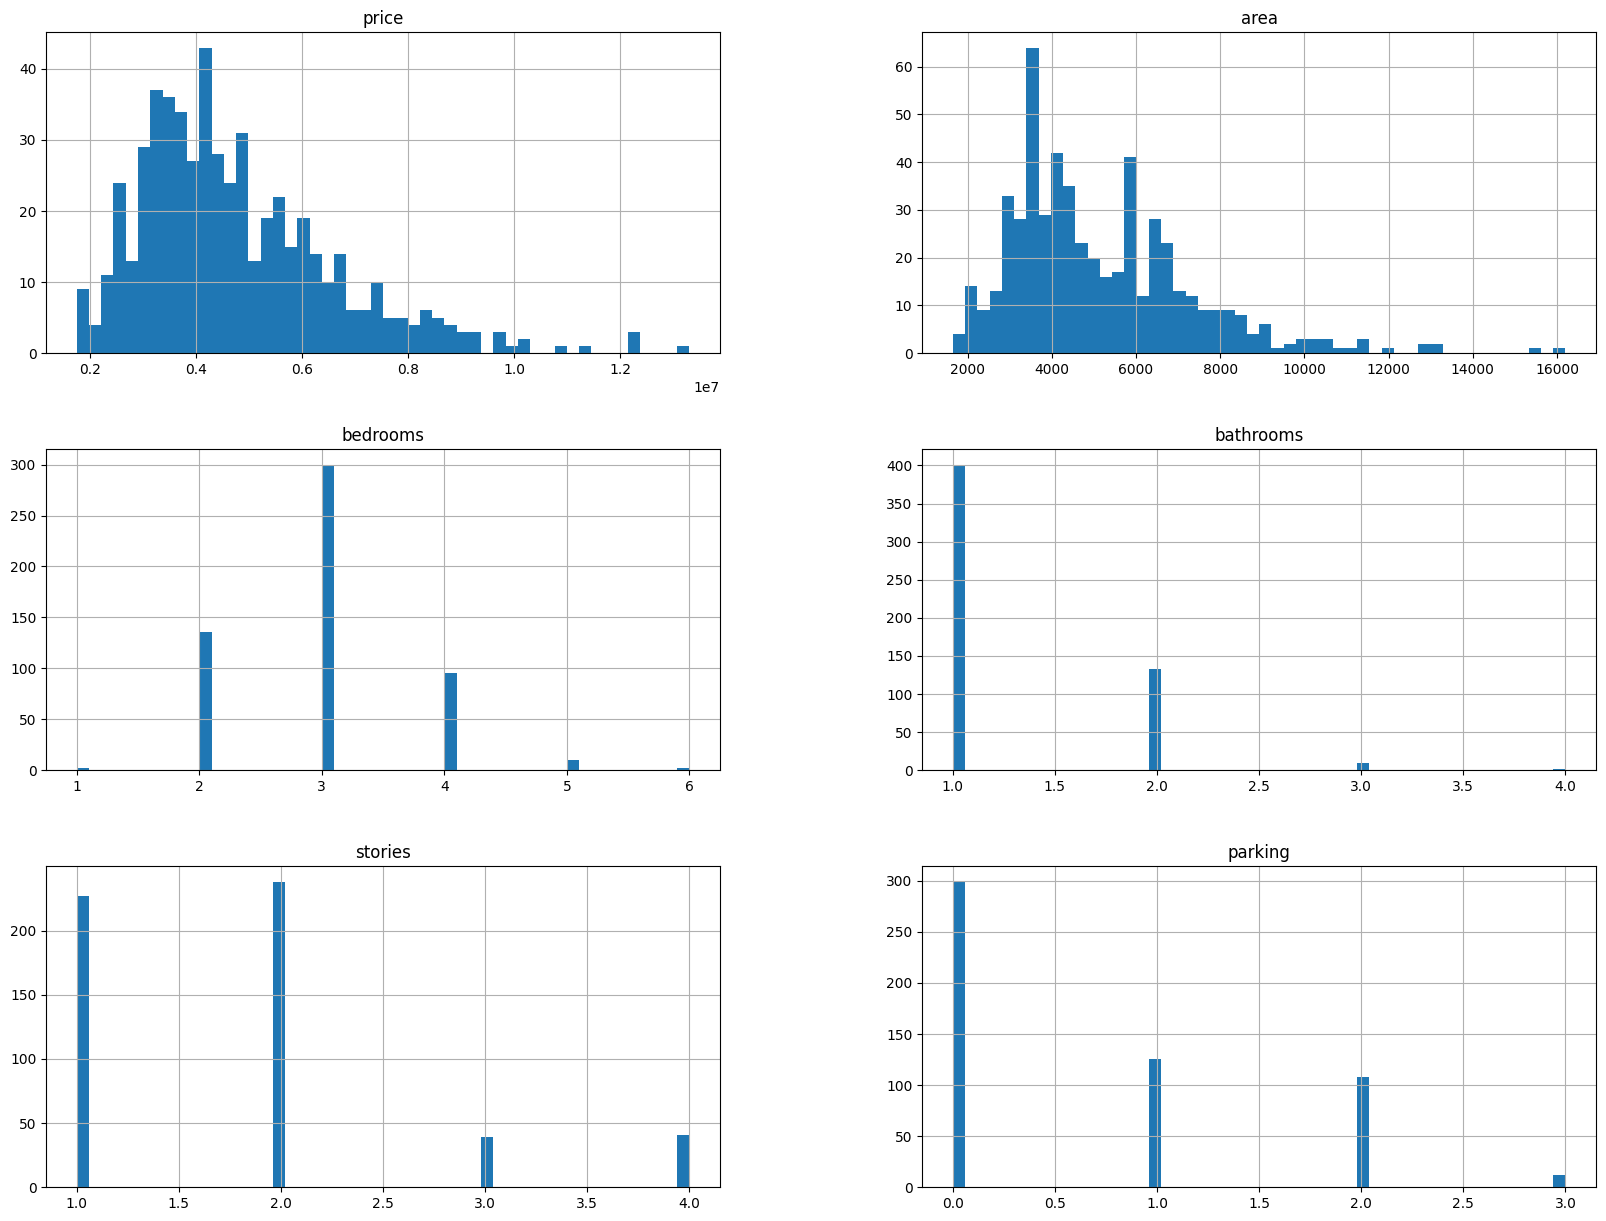

In [106]:
#Graficar todos los datos
df.hist(bins=50, figsize=(20,15))

In [107]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']

#Trae los valores que no son numericos
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


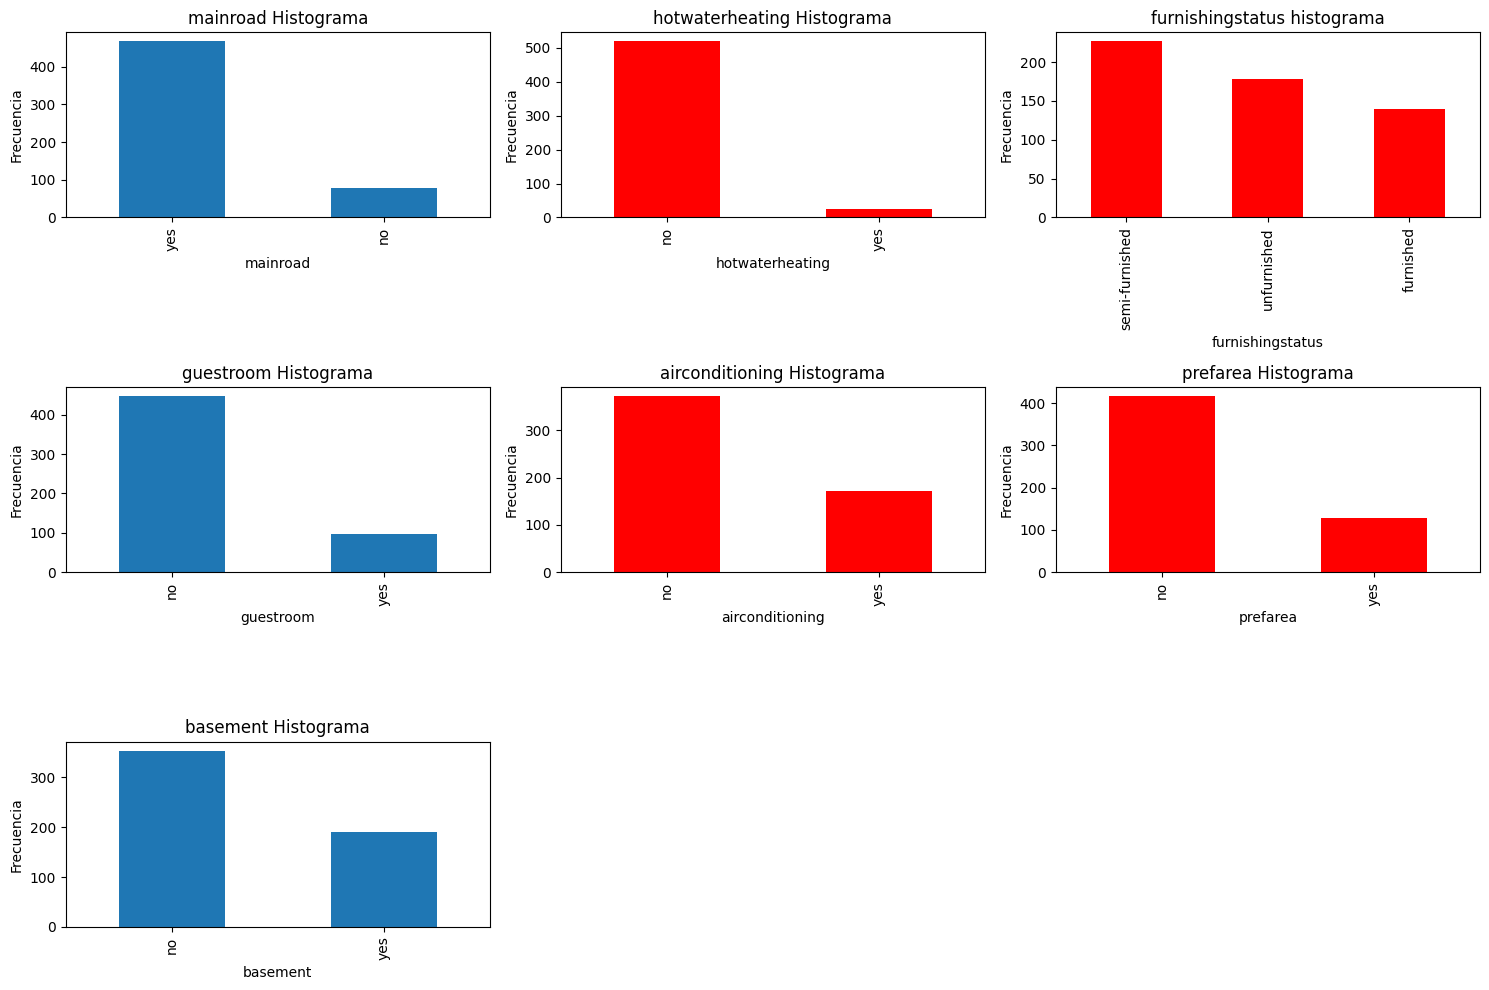

In [108]:
#GRAFICAR DATOS CATEGORICOS
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histograma')
plt1.set(xlabel = 'mainroad', ylabel='Frecuencia')

plt.subplot(3,3,4)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histograma')
plt1.set(xlabel = 'guestroom', ylabel='Frecuencia')

plt.subplot(3,3,7)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histograma')
plt1.set(xlabel = 'basement', ylabel='Frecuencia')

plt.subplot(3,3,2)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histograma')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frecuencia')

plt.subplot(3,3,5)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histograma')
plt1.set(xlabel = 'airconditioning', ylabel='Frecuencia')

plt.subplot(3,3,6)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histograma')
plt1.set(xlabel = 'prefarea', ylabel='Frecuencia')

plt.subplot(3,3,3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus histograma')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

In [109]:
#Preparacion de los datos
df.isnull().values.any() #Verifica si hay valores nulos

#Eliminar valores nulos
#df = df.dropna()
#Verifica cuantos se han borrado
#len(df)

False

In [110]:
#LISTA PARA VARIABLES NUMERICAS
numerical = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [111]:
#Confirmar que estan todas las columnas en el dataframe
df_numerical = df[numerical]
df_categorical = df[categorical_list]

In [112]:
# Defininendo la funcion de dummies
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Aplicando la funciona a los valores categoritos

df = dummies('mainroad',df)
df = dummies('guestroom',df)
df = dummies('hotwaterheating',df)
df = dummies('basement',df)
df = dummies('airconditioning',df)
df = dummies('prefarea',df)
df = dummies('furnishingstatus',df)

In [113]:
#Para validar que se hicieron cambios
df.head()

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,1,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,1,0,0,0


DIVIDIR LOS DATOS PARA ENTRENAMIENTO  Y PRUEBAS

In [114]:
numpy.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100) #0.7 es el 70% para entrenamiento

In [115]:
scaler = MinMaxScaler()
df_train[numerical] = scaler.fit_transform(df_train[numerical])

In [116]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333,1,0,0,0,0,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333,1,0,0,0,1,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000,1,1,0,1,1,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667,1,0,0,0,1,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667,1,0,1,1,0,0,0,1


In [117]:
y_train = df_train.pop('price')
X_train = df_train

In [118]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

CREACION DEL MODELO

In [119]:
X_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'yes', 'yes',
       'yes', 'yes', 'yes'],
      dtype='object')

In [120]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
359,0.155227,0.4,0.0,0.000000,0.333333,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,0.403379,0.4,0.5,0.333333,0.333333,1,0,0,0,1,...,0,0,1,1,1,0,0,0,1,1
159,0.115628,0.4,0.5,0.000000,0.000000,1,1,0,1,1,...,0,1,1,0,1,1,0,1,1,0
35,0.454417,0.4,0.5,1.000000,0.666667,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
28,0.538015,0.8,0.5,0.333333,0.666667,1,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0


In [121]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) # Resumen del modelo
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#Modelo 1

In [122]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     69.10
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.34e-82
Time:                        14:59:14   Log-Likelihood:                 376.89
No. Observations:                 381   AIC:                            -729.8
Df Residuals:                     369   BIC:                            -682.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.018      0.044      0.9

In [123]:
X_train_new = X_train_new.drop(["bedrooms"], axis = 1)

#MODELO 2

In [124]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     75.59
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.09e-83
Time:                        14:59:14   Log-Likelihood:                 375.84
No. Observations:                 381   AIC:                            -729.7
Df Residuals:                     370   BIC:                            -686.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.014      1.263      0.2

In [125]:
#Calculando la varianza
checkVIF(X_train_new)

c:\Users\RAMIRO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
17,yes,inf
26,yes,inf
20,yes,inf
21,yes,inf
22,yes,inf
23,yes,inf
24,yes,inf
25,yes,inf
27,yes,inf
18,yes,inf


In [126]:
X_train_new = X_train_new.drop(["yes"], axis = 1)

#MODELO 3

In [127]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           8.47e-67
Time:                        14:59:14   Log-Likelihood:                 322.74
No. Observations:                 381   AIC:                            -635.5
Df Residuals:                     376   BIC:                            -615.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0680      0.011      6.150      0.0

In [128]:
#Calculando la varianza
checkVIF(X_train_new)

,Features,VIF
0,const,4.28
1,area,1.17
4,parking,1.17
2,bathrooms,1.13
3,stories,1.10


In [129]:
lm = sm.OLS(y_train,X_train_new).fit()

In [130]:
# Escalando los valores 
df_test[numerical] = scaler.transform(df_test[numerical])

In [131]:
#Dividir la variable x de la variable y del conjunto de prueba
y_test = df_test.pop('price')
X_test = df_test

In [132]:
# seleccionando las características elegidas del conjunto de entrenamiento para el conjunto de prueba
X_train_new = X_train_new.drop('const',axis=1)
# Creando el dataframe X_test_new eliminando variables de X_test
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [133]:
#PREDICCIONES
# Seleccionar 5 observaciones aleatorias del conjunto de prueba
random_indices = numpy.random.choice(X_test_new.index, size=3, replace=False)

# Extraer las características y etiquetas correspondientes
X_random = X_test_new.loc[random_indices]
y_true = y_test.loc[random_indices]

# Realizar predicciones
y_pred = lm.predict(X_random)

# Crear un DataFrame para mostrar los resultados
results = pd.DataFrame({
    'Precio predicho': y_pred,
    'Precio verdadero': y_true
})

print(results)

     Precio predicho  Precio verdadero
400         0.147458          0.151515
470         0.166678          0.109091
424         0.155493          0.139394
